1. Data Load 

In [87]:
#라이브러리 불러오기
import pandas as pd
import numpy as np

In [88]:
#데이터를 불러와서 변수에 저장
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

#제출 양식를 불러와서 submission 변수에 저장
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [7]:
#불러온 데이터 확인
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
test_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [10]:
import random
np.random.seed(1234) # Fix seed numpy module
random.seed(1234) # Fix seed random module
#사용하는 랜덤값의 시드를 1234로 고정하여 매번 실행할 때마다 같은 결과를 얻음

2. EDA and Data Visualization 

In [11]:
# Display rows and columns
print(train_df.shape)
print(test_df.shape)
#데이터의 행과 열 개수 출력

(891, 12)
(418, 11)


In [12]:
# Preview data contents
# Adjust maximum and minimum output limits
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)
#DataFrame을 출력할 때 최대 50개의 행/열이 보이도록 설정

In [13]:
# Output top 10 rows
train_df.head(10)
#데이터프레임의 앞쪽 10개의 행을 출력해서 데이터를 미리 보기

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [15]:
# Check data type
train_df.dtypes
#각 열이 어떤 데이터 타입을 가지는지 확인

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# Check data statistics
train_df.describe()
#수치형 데이터에 대한 기본적인 통계 정보 확인 (평균, 표준편차, 최소/최대값, 4분위수 등)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
# Check category variables
train_df["Sex"].value_counts()
# train_df의 'Sex' 컬럼에 등장하는 각 값이 몇 번 나오는지 알려줌

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
train_df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [21]:
# Check missing value
train_df.isnull().sum()
#각 컬럼에 결측치(null)가 몇 개인지

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
test_df.isnull().sum()
#각 컬럼에 결측치(null)가 몇 개인지

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Style setting
plt.style.use("ggplot")
#ggplot 그래프 스타일

In [25]:
# Extract rows and columns
train_df[["Embarked", "Survived", "PassengerId"]]
#'Embarked', 'Survived', 'PassengerId' 열만 추출해서 데이터프레임 생성

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [26]:
# Exclude missing value
train_df[["Embarked", "Survived", "PassengerId"]].dropna()
#위에서 생성한 데이터 프레임에서 결측치가 있는 행 모두 제거

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [27]:
# Grouping
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()
#'Embarked'와 'Survived'별로 그룹화 한 뒤, 각 그룹의 승객 수 기기

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [28]:
# Horizontal transformation
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()
embarked_df
#피벗 테이블 형태로 변환

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: xlabel='Embarked'>

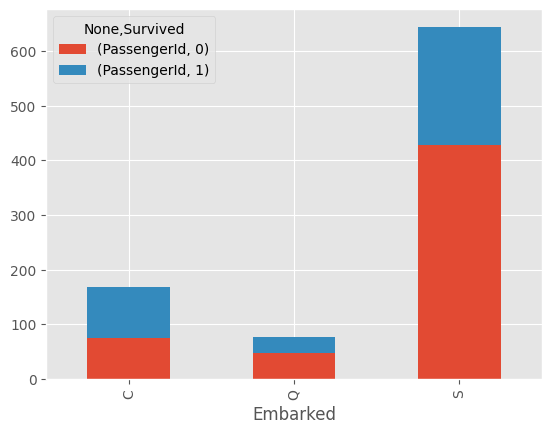

In [29]:
# Bar graph visualization
embarked_df.plot.bar(stacked=True)
#변환된 데이터 확인

In [30]:
# Add survived rate
embarked_df["survived_rate"] = embarked_df.iloc[:,0] / (embarked_df.iloc[:,0] + embarked_df.iloc[:,1])
embarked_df
#항구별 생존률 열을 계산해서 추가

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

<Axes: xlabel='Sex'>

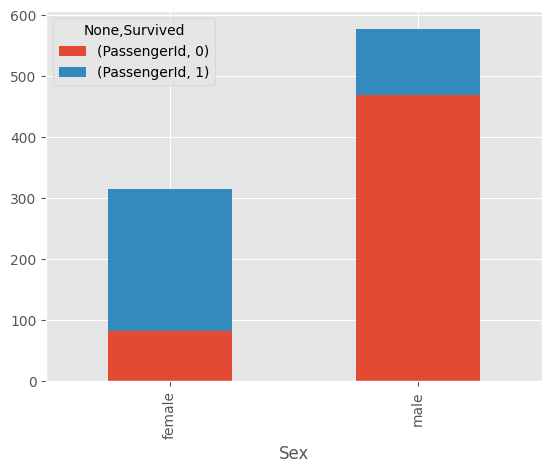

In [31]:
# Sex visualization
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)
#'Sex'와 'Survived'별로 승객 수를 세어서 피벗 테이블로 만듦
#'Sex'와 'Survived'별 승객 수를 누적 막대그래프로 그림

<Axes: xlabel='Pclass'>

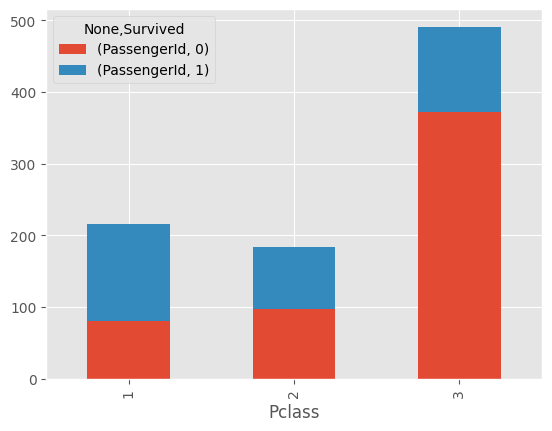

In [32]:
# Pclass visualization
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)
#'Pclass'과 생존여부별로 승객 수를 세어서 피벗 테이블 만듦

<Axes: xlabel='Age'>

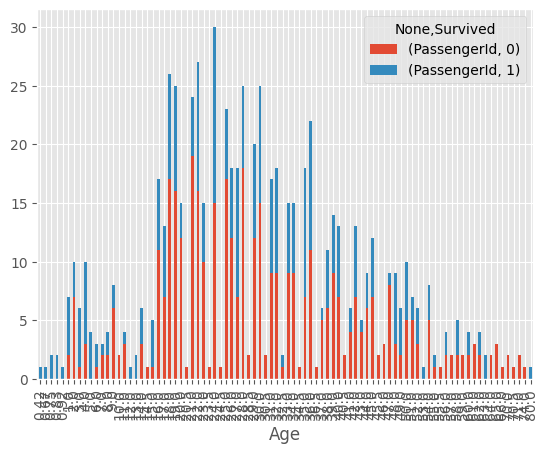

In [33]:
# Age visualization
age_df = train_df[["Age", "Survived", "PassengerId"]].dropna().groupby(["Age", "Survived"]).count().unstack()
age_df.plot.bar(stacked=True)
#'Age'와 생존여부별로 승객 수를 세어서 피벗 테이블로 만듦

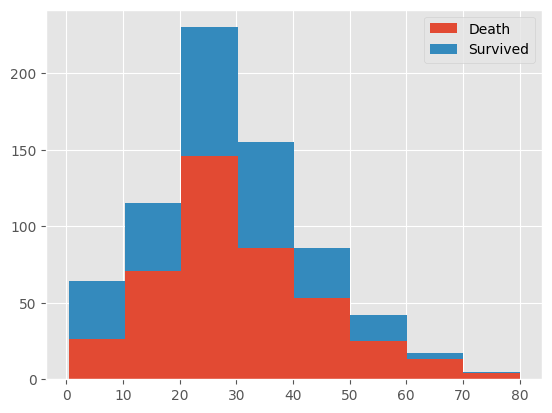

In [34]:
# Age histogram visualization
plt.hist(x=[train_df.Age[train_df.Survived == 0], train_df.Age[train_df.Survived==1]], bins=8, histtype='barstacked', label=["Death", "Survived"])
plt.legend()
#사망자와 생존자의 나이 분포 히스토그램 그림
#legend 그래프에 표시(범례)

In [35]:
# Dummy variable
train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])
train_df_corr.head()
#더미 변수 생성
#'Sex' 컬럼을 0과 1로 변환하여 새로운 더미 변수 컬럼을 생성
#drop_first=True 옵션으로 'female' 컬럼 없이 'male' 컬럼만 만들어서 두 값을 0/1(하나의컬럼)으로 구분 가능

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True


In [36]:
# Correlation matrix
train_corr = train_df_corr.select_dtypes(include=["number", "bool"]).corr()
train_corr
#상관 계수 행렬 계산
#숫자형이나 bool타입 데이터만 골라 각 컬럼의 상관관계 계산 및 상관계수 행렬 출력

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

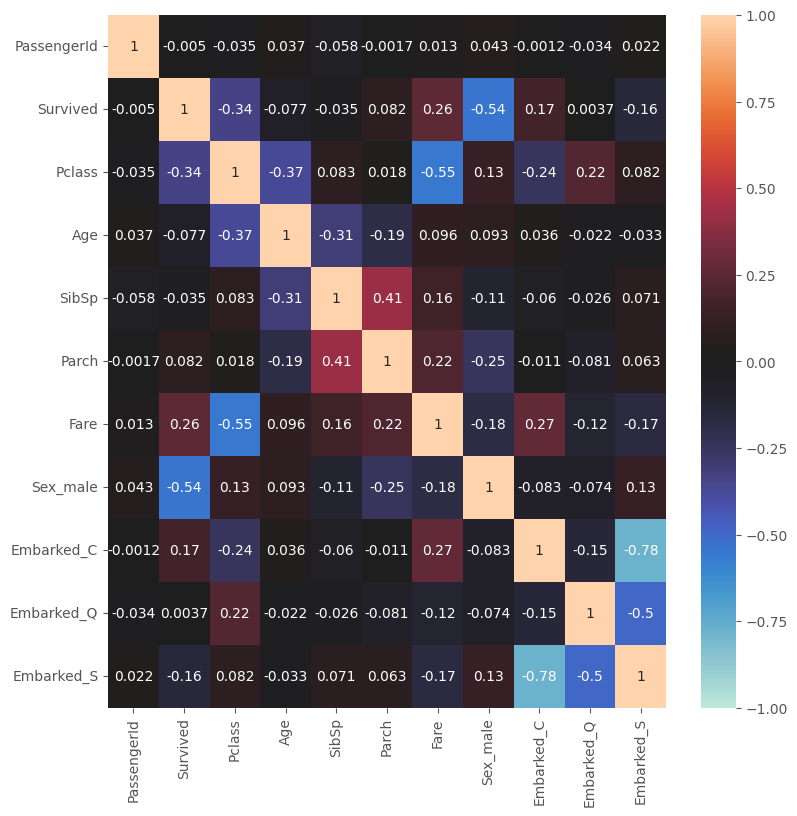

In [37]:
# Heatmap visualization
plt.figure(figsize=(9, 9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)
#그림 크기 9x9로 지정
#seaborn의 heatmap 함수를 사용하여 train_corr(상관계수 행렬)을 색상으로 표현
#vmax=1, vmin=-1: 색상의 최댓값/최솟값을 -1~1로 고정 (상관계수 범위에 맞춤)
#center=0: 색상의 기준점(0) 지정 → 양의 상관/음의 상관을 색으로 구분
#annot=True: 각 칸에 실제 숫자 값(상관계수)을 함께 표시

3. Data Preprocessing

In [38]:
# Merge data
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)
all_df
#train_df와 test_df를 세로로 합침

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
# Check missing value
all_df.isnull().sum()
#결측치 수 확인

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [40]:
#Pclass별 평균 요금을 구한다
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()

#계산된 컬럼명 변경
Fare_mean.columns = ["Pclass", "Fare_mean"]

Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [41]:
#객실 등급별 평균요금을 병합하여 각 승객에 맞는 평균값 붙기기
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")

#Fare 빈 곳에 해당 Pclass의 평균 Fare 값 넣어기기
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]

#임시로 만든 평균 Fare 컬럼 삭제
all_df = all_df.drop("Fare_mean", axis=1)

In [42]:
all_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [43]:
#Name컬럼에서 이름을 성, 호칭, 이름 세개로 나눔
#쉼표나 마침표로 구분
name_df = all_df["Name"].str.split("[,.]", n = 2, expand=True)

#컬럼 이름 변경
name_df.columns = ["family_name", "honorific", "name"]

name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [44]:
#이름 데이터 각 부분 공백 거거
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

In [45]:
#호칭 세기
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [46]:
#이름 정보 합치기(가로 방향 열 추가)
all_df = pd.concat([all_df, name_df], axis=1)

all_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific', ylabel='Age'>

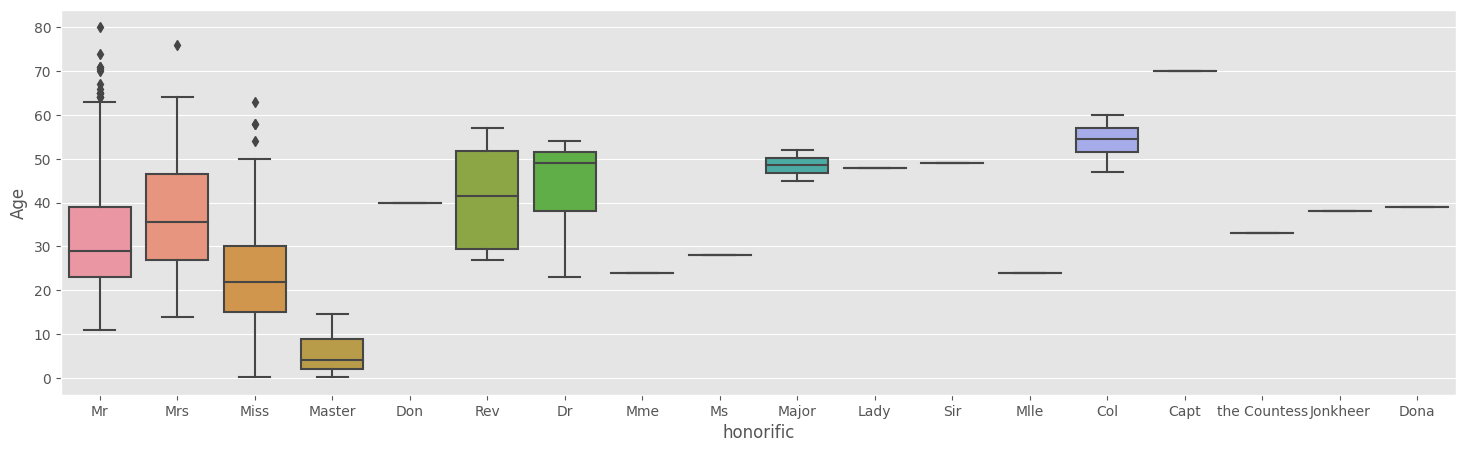

In [47]:
#호칭별 나이 분포 시각화
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

In [48]:
#학습/테스트 셋에 이름 정보 할당
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):]])

<Axes: xlabel='honorific'>

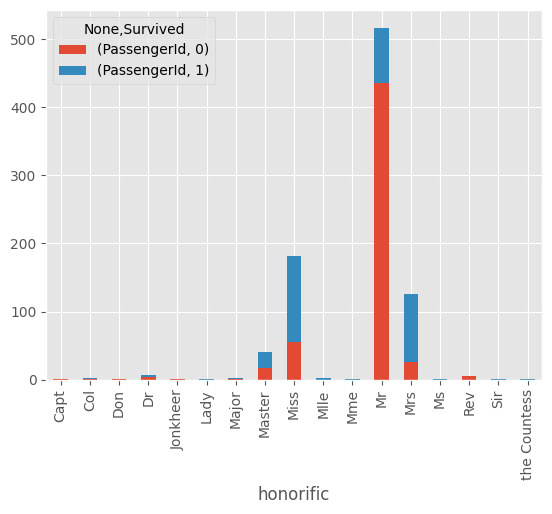

In [49]:
#호칭별 생존자/사망자 분포 시각화
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

In [50]:
#호칭별 평균 나이 계산
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()

#컬럼 이름 변경
honorific_age_mean.columns = ["honorific", "honorific_Age"]

#평균 나이 정보를 호칭 기준으로 all_df에 병합
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")

#빈 나이 값에 평균나이 채우기
all_df.loc[all_df["Age"].isnull(), "Age"] = all_df["honorific_Age"]

#임시 평균나이 컬럼 삭제
all_df = all_df.drop(["honorific_Age"], axis=1)

In [51]:
#가족 수 계산(부모/자녀 수 + 형제/자매 수)
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [52]:
#혼자인지 아닌지 여부 변수 생성
#혼자면 alone=1
all_df.loc[all_df["family_num"]==0, "alone"] = 1
all_df["alone"] = all_df["alone"].fillna(0)

In [53]:
#불필요한 열 삭제
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis = 1)

all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [54]:
#문자열 컬럼만 따로 변수 저장
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [55]:
#자주 등장하지 않는 호칭은 other로 통합
all_df.loc[~((all_df["honorific"]=="Mr") | (all_df["honorific"]=="Miss") | (all_df["honorific"]=="Mr") | (all_df["honorific"]=="Master")), "honorific"] = "other"

all_df.honorific.value_counts()

honorific
Mr        757
Miss      260
other     231
Master     61
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
#Embarked 결측치는 문자열 missing으로 체체
all_df["Embarked"].fillna("missing", inplace=True)
all_df.head()

/tmp/ipykernel_36/2004711249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["Embarked"].fillna("missing", inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,other,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,other,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [58]:
#LabelEnoder로 Sex 문자를 숫자로 변환
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,C,other,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,S,other,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,S,Mr,0,1.0


In [59]:
#모든 칼럼에 대해 반복 적용(문자->숫자)
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

all_df.head()

Sex
Embarked
honorific


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [60]:
#학습 데이터(feature)
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

#학습 데이터(target)
train_Y = train_df["Survived"]

#테스트 데이터(features)
test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

4. Modeling

In [61]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [62]:
#학습/테스트 데이터 분할
#전체 학습 데이터에서 20퍼만 검증 데이터로 분리 
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)

In [63]:
#LightGBM 전용 데이터셋 생성
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]

# 학습 데이터(lgb_train)와 검증 데이터(lgb_eval)를 각각 LGBM 전용 포맷으로 만듦
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [64]:
#하이퍼파라미터(모델 세부 설정) 지정
lgbm_params = {
    "objective":"binary",
    "random_seed":1234
}
#이진 분류 문제이므로 objective는 'binary'
#랜덤 시드 고정

In [1]:
#LightGBM 모델 학습
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      num_boost_round=100,
                      valid_sets=[lgb_eval],
                      callbacks=[
                          lgb.early_stopping(stopping_rounds=20),
                          lgb.log_evaluation(period=10)
                      ]
)
#순서대로 모델 설정(하이퍼파라미터),학습 데이터셋, 반복 최대 100번,검증 데이터로 성능 평가
#20번 동안 개선 없으면 학습, 10회마다 로그 출력

NameError: name 'lgb' is not defined

In [66]:
#각 변수의 중요도 점수
model_lgb.feature_importance()

array([ 34,  19, 184,  20,   8, 241,  27,   3,  19,   0], dtype=int32)

<Axes: >

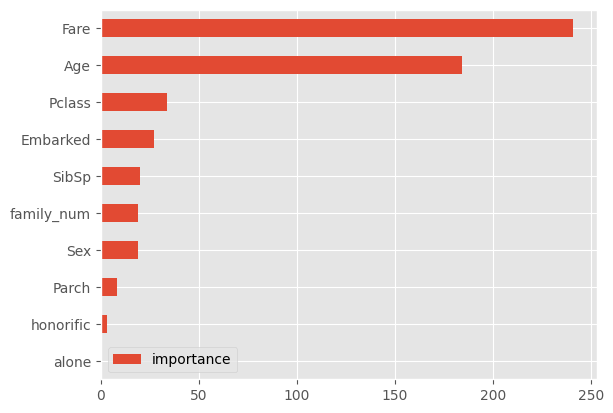

In [67]:
#변수 중요도 시각화
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance", ascending=True)
importance.plot.barh()

5. Model Evaluation

In [68]:
#검증 데이터(X_valid)에 모델 적용해서 예측값 생성
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
#예측 결과의 정확도 계산
accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

In [71]:
#하이퍼파라미터 튜닝
lgbm_params = {
    "objective": "binary",
    "learning_rate": 0.05,
    "random_seed": 1234
}
#순서대로 이진분류, 학습률 낮춰서 천천히 정밀하게 학습, 랜덤드드

In [72]:
#데이터셋 다시 생성
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [73]:
#LightGBM 재학습
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      num_boost_round=100,
                      valid_sets=[lgb_eval],
                      callbacks=[
                          lgb.early_stopping(stopping_rounds=20),
                          lgb.log_evaluation(period=10)
                      ]
)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [74]:
#변수 중요도 재확인
model_lgb.feature_importance()

array([ 66,  37, 384,  39,  19, 497,  58,   8,  35,   5], dtype=int32)

<Axes: >

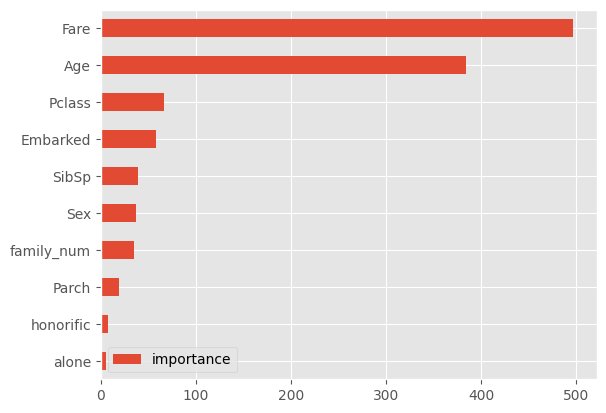

In [75]:
#변수 중요도 시각화
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance", ascending=True)
importance.plot.barh()

In [76]:
#검증 데이터에 대해 다시 예측 수행
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [78]:
#예측 결과를 0/1로 바꿔서 정확도 계산
accuracy_score(y_valid, np.round(y_pred))

0.8491620111731844

In [79]:
#Cross Validation 설정(데이터 삼등분)
folds = 3
kf = KFold(n_splits=folds)

In [80]:
#각 fold에서의 정확도 저장할 리스트 만들기
accuracy_list = []

#K-fold 교차검증 반복 학습 및 평가
models = []
for train_index, val_index in kf.split(train_X):
    #fold의 학습/검증 데이터 인덱스 추출
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    #LightGBM 전용 데이터셋 생성
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

    #모델 학습
    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        num_boost_round=100,
        valid_sets=[lgb_eval],
        callbacks=[
            lgb.early_stopping(stopping_rounds=20),
            lgb.log_evaluation(period=10)
        ]
    )

    #fold의 검증 데이터 예측 및 정확도 평가
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    acc = accuracy_score(y_valid, np.round(y_pred))
    print("Fold accuracy:", acc)
    accuracy_list.append(acc)

    #학습된 모델 저장
    models.append(model_lgb)

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [81]:
#K-fold 교차검증 평균 정확도 계산 및 출력
mean_accuracy = np.mean(accuracy_list)
print("Average Cross-Validation Accuracy:", mean_accuracy)

Average Cross-Validation Accuracy: 0.8350168350168351


In [82]:
#테스트 데이터 예측 (fold별 모두 예측해서 저장)
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [83]:
#각 fold 예측 결과를 numpy 배열로 변환
preds_array = np.array(preds)

#fold별 예측의 평균값을 계산
preds_mean = np.mean(preds_array, axis=0)

In [84]:
#최종 예측(확률값 0/1로 변환) - 0.5 넘으면 1, 아니면 0
preds_int = (preds_mean > 0.5).astype(int)

6. Submission 

In [85]:
#제출 파일에 예측 결과 넣기
submission["Survived"] = preds_int
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [86]:
#파일 저장
submission.to_csv("titanic_submit01.csv", index=False)